(attribute)=
# Attribute

Yes, the term **pruning** in neural network training is indeed borrowed from the concept of pruning tree branches. It’s an evocative metaphor for simplifying a complex structure to make it more efficient while preserving its core function. Let’s delve into the technical aspects of pruning and its implications for edges, weights, and nodes:

### Pruning in Neural Networks: Purpose and Concept
Pruning in neural networks refers to the process of reducing the size of the network by removing unnecessary components—typically weights (connections) or even entire nodes (neurons). The goal is to create a smaller, more efficient model that still performs well on its task. This is akin to pruning branches on a tree to focus the plant’s energy on essential growth and yield. In neural networks, pruning eliminates redundancy and overfitting, improves computational efficiency, and allows the model to generalize better.

---

### **Pruning Weights**
The most common form of pruning involves **edges**—the connections between nodes. These connections are associated with weights, which indicate the strength of the influence a node has on another. During pruning:
1. **Zeroing Weights**: Weights that are deemed insignificant (e.g., close to zero) are set to exactly zero. This essentially means the connection is inactive but still present in the model.
2. **Removing Edges**: Instead of setting the weight to zero, some pruning techniques physically remove the edge from the network graph, reducing the number of parameters.
   
While zeroing weights achieves the same functional outcome as removing edges, physically removing them leads to a more compact model, reducing memory and computational requirements.

```{figure} ../../figures/trees.*
---
width: 100%
height: 100%
---
Glenn Gould and Leonard Bernstein famously disagreed over the tempo and interpretation of Brahms' First Piano Concerto during a 1962 New York Philharmonic concert, where Bernstein, conducting, publicly distanced himself from Gould's significantly slower-paced interpretation before the performance began, expressing his disagreement with the unconventional approach while still allowing Gould to perform it as planned; this event is considered one of the most controversial moments in classical music history. 
```

---

### **Pruning Nodes**
Pruning can also extend to **nodes** (neurons). If a node's connections to other neurons are all pruned (or its output has negligible impact), the node itself may be removed. However, this is less common than edge pruning because:
- Removing nodes risks disrupting the overall architecture of the network.
- A node may have latent potential for future tasks, and its removal could limit the model’s adaptability.

Instead of removing nodes, it’s often preferable to deactivate them temporarily (via zeroing weights) so they can be reactivated during retraining if necessary. This approach provides flexibility without the irreversible loss of information.

---

### **How Pruning Decisions Are Made**
The decision to prune weights or nodes is based on **importance scores**, which measure how much a weight or node contributes to the network’s performance. Some methods for pruning include:
1. **Magnitude-Based Pruning**: Connections with the smallest absolute weights are removed or zeroed out, under the assumption that they contribute the least.
2. **Gradient-Based Pruning**: Weights with the smallest gradients (i.e., those least adjusted during training) are pruned, as they have minimal influence on the loss function.
3. **Structured Pruning**: Removes entire blocks of weights or filters, such as those corresponding to a specific layer or neuron.

---

### **Benefits of Pruning**
1. **Reduced Overfitting**: By eliminating redundant connections, the model is less likely to memorize noise in the data.
2. **Improved Efficiency**: A pruned network is faster to train and deploy, consuming less memory and computational power.
3. **Model Compression**: Pruned models are smaller, making them easier to store and share.

---

### **Why Not Just Zero Weights Instead of Removing Nodes?**
1. **Memory and Computation**: Zeroed weights still occupy memory and computational resources, whereas removed connections or nodes physically reduce the network's size.
2. **Inference Efficiency**: For deployment, a network with zeroed weights may still require the same number of calculations, while a pruned network is inherently simpler and faster.
3. **Model Interpretability**: Pruning clarifies the structure of the network by removing unnecessary components, making the model easier to analyze.

---

In summary, pruning simplifies a neural network by reducing weights and, occasionally, nodes. It’s a deliberate trade-off between retaining performance and optimizing efficiency. While zeroing weights is less aggressive and preserves flexibility, removing nodes or edges outright achieves a leaner, more computationally efficient network. The key is to balance pruning with preserving the network’s capacity for generalization and adaptability, much like ensuring a pruned tree remains healthy and productive.


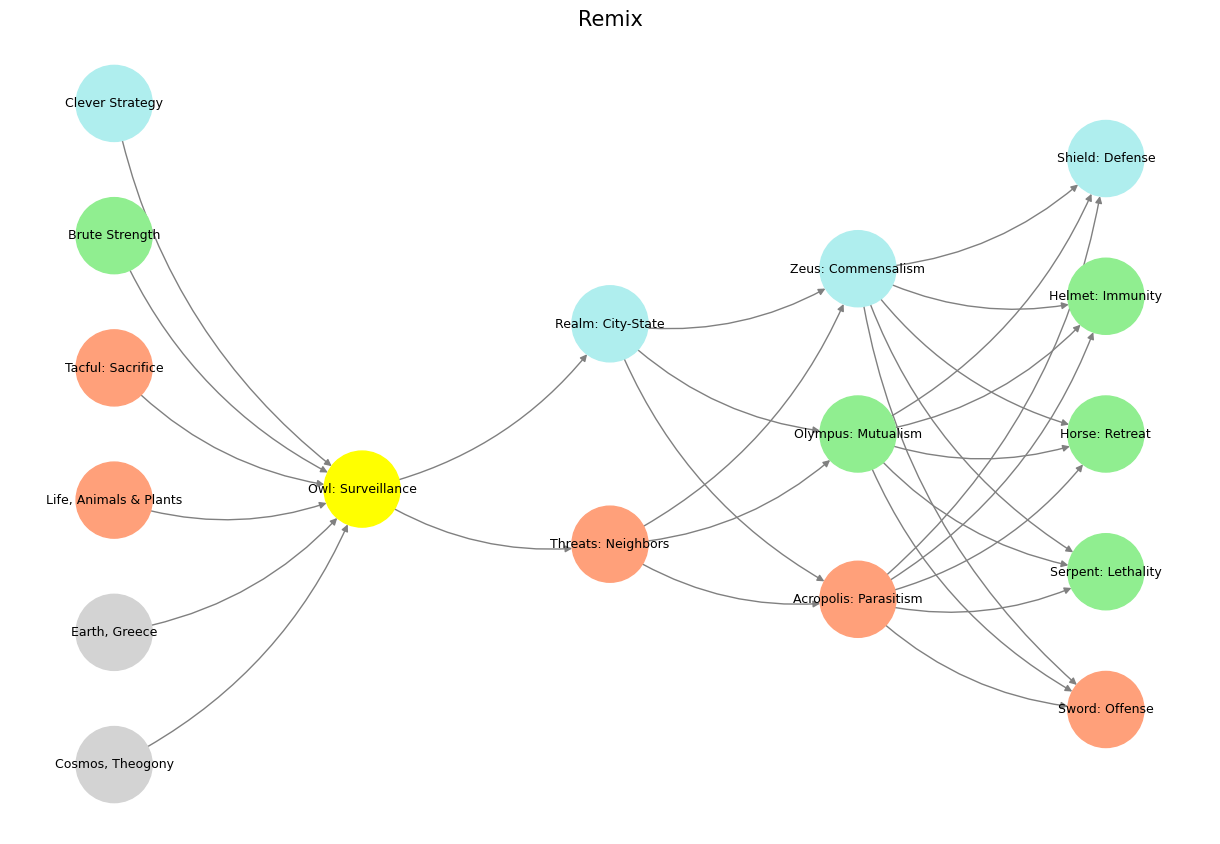

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

# Define the neural network structure
def define_layers():
    return {
        'World': [
            'Cosmos, Theogony', 'Earth, Greece', 'Life, Animals & Plants',
            'Tacful: Sacrifice', 'Brute Strength', 'Clever Strategy'
        ],
        'Perception': ['Owl: Surveillance'],
        'Agency': ['Threats: Neighbors', 'Realm: City-State'],
        'Generativity': [
            'Acropolis: Parasitism', 'Olympus: Mutualism', 'Zeus: Commensalism'
        ],
        'Physicality': [
            'Sword: Offense', 'Serpent: Lethality', 'Horse: Retreat',
            'Helmet: Immunity', 'Shield: Defense'
        ]
    }

# Assign colors to nodes
def assign_colors():
    color_map = {
        'yellow': ['Owl: Surveillance'],
        'paleturquoise': [
            'Clever Strategy', 'Realm: City-State', 'Zeus: Commensalism',
            'Shield: Defense'
        ],
        'lightgreen': [
            'Brute Strength', 'Olympus: Mutualism', 'Helmet: Immunity',
            'Horse: Retreat', 'Serpent: Lethality'
        ],
        'lightsalmon': [
            'CosmosX, Theogony', 'EarthX, Greece', 'Life, Animals & Plants',
            'Tacful: Sacrifice', 'Acropolis: Parasitism', 'Sword: Offense',
            'Threats: Neighbors'
        ],
    }
    return {node: color for color, nodes in color_map.items() for node in nodes}

# Calculate positions for nodes
def calculate_positions(layer, x_offset):
    y_positions = np.linspace(-len(layer) / 2, len(layer) / 2, len(layer))
    return [(x_offset, y) for y in y_positions]

# Create and visualize the neural network graph
def visualize_nn():
    layers = define_layers()
    colors = assign_colors()
    G = nx.DiGraph()
    pos = {}
    node_colors = []

    # Add nodes and assign positions
    for i, (layer_name, nodes) in enumerate(layers.items()):
        positions = calculate_positions(nodes, x_offset=i * 2)
        for node, position in zip(nodes, positions):
            G.add_node(node, layer=layer_name)
            pos[node] = position
            node_colors.append(colors.get(node, 'lightgray'))  # Default color fallback

    # Add edges (automated for consecutive layers)
    layer_names = list(layers.keys())
    for i in range(len(layer_names) - 1):
        source_layer, target_layer = layer_names[i], layer_names[i + 1]
        for source in layers[source_layer]:
            for target in layers[target_layer]:
                G.add_edge(source, target)

    # Draw the graph
    plt.figure(figsize=(12, 8))
    nx.draw(
        G, pos, with_labels=True, node_color=node_colors, edge_color='gray',
        node_size=3000, font_size=9, connectionstyle="arc3,rad=0.2"
    )
    plt.title("Remix", fontsize=15)
    plt.show()

# Run the visualization
visualize_nn()

```{figure} ../../figures/blanche.*
---
width: 1
height: 1
---
Glenn Gould and Leonard Bernstein famously disagreed over the tempo and interpretation of Brahms' First Piano Concerto during a 1962 New York Philharmonic concert, where Bernstein, conducting, publicly distanced himself from Gould's significantly slower-paced interpretation before the performance began, expressing his disagreement with the unconventional approach while still allowing Gould to perform it as planned; this event is considered one of the most controversial moments in classical music history. 
```